<a href="https://colab.research.google.com/github/kimaniTilus/Ob.prj/blob/main/Student_enrollment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Example: Install XGBoost
!pip install xgboost


In [6]:
import pandas as pd

# Generate a sample dataset
data = {
    'high_school_gpa': [3.8, 2.5, 3.2, 3.0, 3.9, 2.0, 3.6, 2.8, 3.1, 3.4],
    'test_score': [90, 50, 70, 50, 30, 85, 25, 95, 20, 15],
    'socioeconomic_status': ['High', 'Low', 'Medium', 'Medium', 'High', 'Low', 'High', 'Low', 'Medium', 'Medium'],
    'attendance_rate': [95, 70, 85, 80, 98, 60, 93, 75, 82, 88],
    'enrolled': [1, 0, 1, 0, 1, 0, 1, 0, 0, 1]  # Target variable
}

# Convert to a DataFrame
df = pd.DataFrame(data)
print(df)


   high_school_gpa  test_score socioeconomic_status  attendance_rate  enrolled
0              3.8          90                 High               95         1
1              2.5          50                  Low               70         0
2              3.2          70               Medium               85         1
3              3.0          50               Medium               80         0
4              3.9          30                 High               98         1
5              2.0          85                  Low               60         0
6              3.6          25                 High               93         1
7              2.8          95                  Low               75         0
8              3.1          20               Medium               82         0
9              3.4          15               Medium               88         1


In [7]:
# Convert categorical data to numeric
df = pd.get_dummies(df, columns=['socioeconomic_status'], drop_first=True)
print(df.head())


   high_school_gpa  test_score  attendance_rate  enrolled  \
0              3.8          90               95         1   
1              2.5          50               70         0   
2              3.2          70               85         1   
3              3.0          50               80         0   
4              3.9          30               98         1   

   socioeconomic_status_Low  socioeconomic_status_Medium  
0                     False                        False  
1                      True                        False  
2                     False                         True  
3                     False                         True  
4                     False                        False  


In [9]:
from sklearn.model_selection import train_test_split

X = df.drop('enrolled', axis=1)  # Features
y = df['enrolled']              # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [10]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [11]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy}")


Model Accuracy: 1.0


In [17]:
import pandas as pd
import numpy as np

# Generate a larger dataset
data = {
    'high_school_gpa': np.random.uniform(2.0, 4.0, 500),  # Random GPAs between 2.0 and 4.0
    'test_score': np.random.randint(800, 1600, 500),      # Random SAT scores
    'socioeconomic_status': np.random.choice(['Low', 'Medium', 'High'], 500),
    'attendance_rate': np.random.uniform(50, 100, 500),   # Attendance percentages
    'parent_education': np.random.choice(['High School', 'College', 'Graduate'], 500),
    'extracurriculars': np.random.choice(['Yes', 'No'], 500),
    'enrolled': np.random.choice([0, 1], 500)            # Enrollment decision
}

# Convert to a DataFrame
df = pd.DataFrame(data)
print(f"Dataset size: {df.shape}")
print(df.head())


Dataset size: (500, 7)
   high_school_gpa  test_score socioeconomic_status  attendance_rate  \
0         2.290819        1127                 High        57.937120   
1         2.936177        1253               Medium        60.423389   
2         2.855998        1367               Medium        89.133692   
3         2.343339         908                  Low        66.690405   
4         3.376880        1498                  Low        54.975066   

  parent_education extracurriculars  enrolled  
0         Graduate              Yes         0  
1          College               No         0  
2      High School               No         0  
3          College               No         1  
4      High School               No         1  


In [18]:
# One-hot encode categorical features
df = pd.get_dummies(df, columns=['socioeconomic_status', 'parent_education', 'extracurriculars'], drop_first=True)
print(df.head())


   high_school_gpa  test_score  attendance_rate  enrolled  \
0         2.290819        1127        57.937120         0   
1         2.936177        1253        60.423389         0   
2         2.855998        1367        89.133692         0   
3         2.343339         908        66.690405         1   
4         3.376880        1498        54.975066         1   

   socioeconomic_status_Low  socioeconomic_status_Medium  \
0                     False                        False   
1                     False                         True   
2                     False                         True   
3                      True                        False   
4                      True                        False   

   parent_education_Graduate  parent_education_High School  \
0                       True                         False   
1                      False                         False   
2                      False                          True   
3                      F

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Split the data into features (X) and target (y)
X = df.drop('enrolled', axis=1)  # Features
y = df['enrolled']              # Target

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))


Model Accuracy: 0.51
              precision    recall  f1-score   support

           0       0.43      0.65      0.51        40
           1       0.64      0.42      0.51        60

    accuracy                           0.51       100
   macro avg       0.53      0.53      0.51       100
weighted avg       0.56      0.51      0.51       100



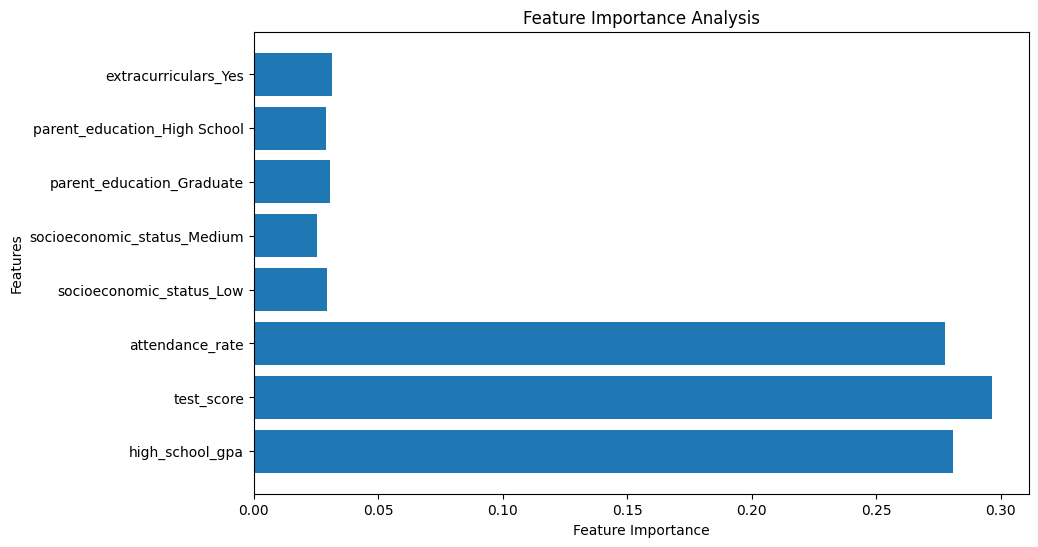

In [20]:
import matplotlib.pyplot as plt

# Get feature importance
importance = model.feature_importances_

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.barh(X.columns, importance)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance Analysis')
plt.show()


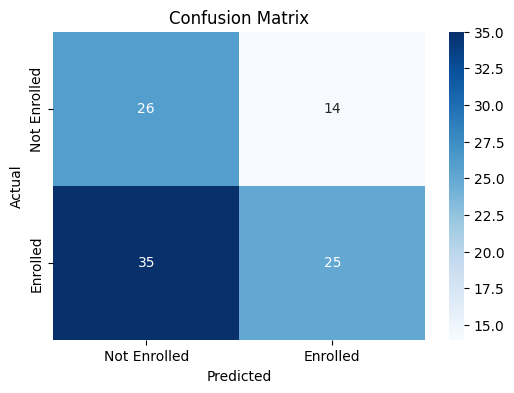

In [21]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Enrolled', 'Enrolled'], yticklabels=['Not Enrolled', 'Enrolled'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


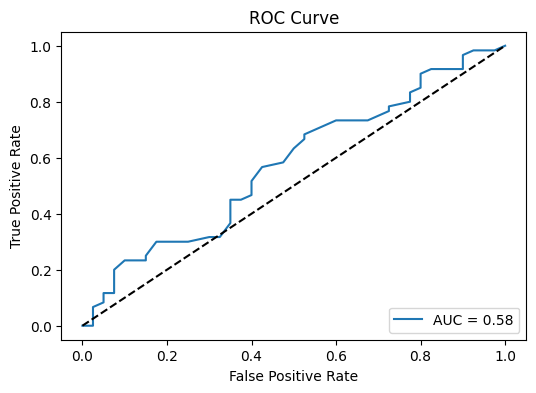

AUC Score: 0.58


In [22]:
from sklearn.metrics import roc_curve, roc_auc_score

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

# Plot ROC curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line (no skill)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

print(f"AUC Score: {auc:.2f}")


In [23]:
from sklearn.metrics import classification_report

# Print classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.43      0.65      0.51        40
           1       0.64      0.42      0.51        60

    accuracy                           0.51       100
   macro avg       0.53      0.53      0.51       100
weighted avg       0.56      0.51      0.51       100



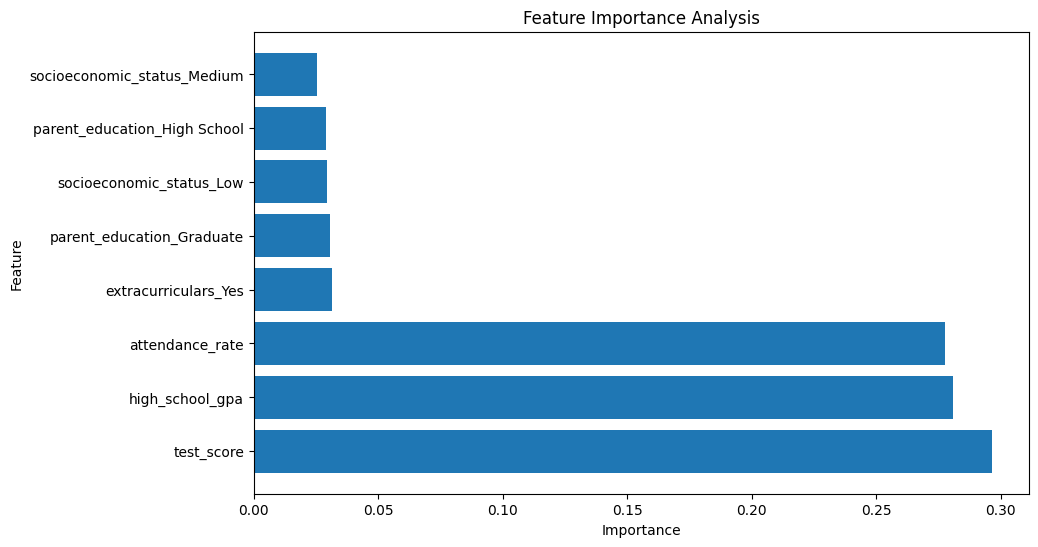

                        Feature  Importance
1                    test_score    0.296424
0               high_school_gpa    0.280781
2               attendance_rate    0.277579
7          extracurriculars_Yes    0.031210
5     parent_education_Graduate    0.030757
3      socioeconomic_status_Low    0.029210
6  parent_education_High School    0.028893
4   socioeconomic_status_Medium    0.025145


In [25]:
# Get feature importance values
importance = model.feature_importances_

# Create a DataFrame for better visualization
features = X.columns
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importance
})

# Sort the features by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance Analysis')
plt.show()

print(importance_df)


In [28]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print(f"Best Hyperparameters: {grid_search.best_params_}")
print(f"Best Cross-validation Accuracy: {grid_search.best_score_}")


Best Hyperparameters: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 200}
Best Cross-validation Accuracy: 0.5225


In [31]:

new_data = pd.DataFrame({
    'high_school_gpa': [3.5],
    'test_score': [1150],
    'attendance_rate': [90],
    'socioeconomic_status_Low': [0],
    'socioeconomic_status_Medium': [0],
    'socioeconomic_status_High': [1],
    'parent_education_High School': [0],
    'parent_education_College': [1],
    'parent_education_Graduate': [0],
    'extracurriculars_Yes': [1]
})


new_data = new_data[X_train.columns]

new_prediction = model.predict(new_data)
print(f"Prediction (1 = Enrolled, 0 = Not Enrolled): {new_prediction[0]}")

Prediction (1 = Enrolled, 0 = Not Enrolled): 1


In [33]:
# Check for missing values
print(df.isnull().sum())

# Optional: Impute or drop missing values (if any)
df.fillna(df.mean(), inplace=True)

# Optional: Scale features (only if using models like Logistic Regression)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['high_school_gpa', 'test_score', 'attendance_rate']] = scaler.fit_transform(df[['high_school_gpa', 'test_score', 'attendance_rate']])


high_school_gpa                 0
test_score                      0
attendance_rate                 0
enrolled                        0
socioeconomic_status_Low        0
socioeconomic_status_Medium     0
parent_education_Graduate       0
parent_education_High School    0
extracurriculars_Yes            0
dtype: int64


In [34]:
# Split the dataset
X = df.drop('enrolled', axis=1)  # Features
y = df['enrolled']  # Target

# Split into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest model
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate the model
from sklearn.metrics import accuracy_score, classification_report
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))


Model Accuracy: 0.51
              precision    recall  f1-score   support

           0       0.43      0.65      0.51        40
           1       0.64      0.42      0.51        60

    accuracy                           0.51       100
   macro avg       0.53      0.53      0.51       100
weighted avg       0.56      0.51      0.51       100



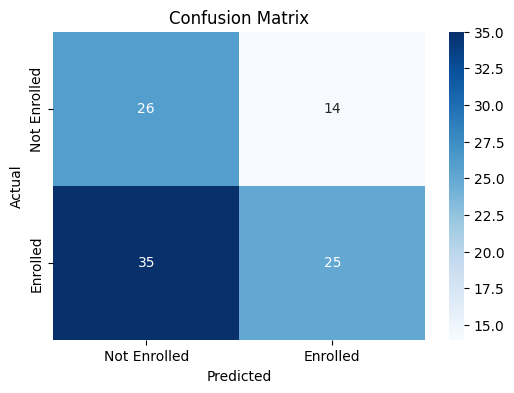

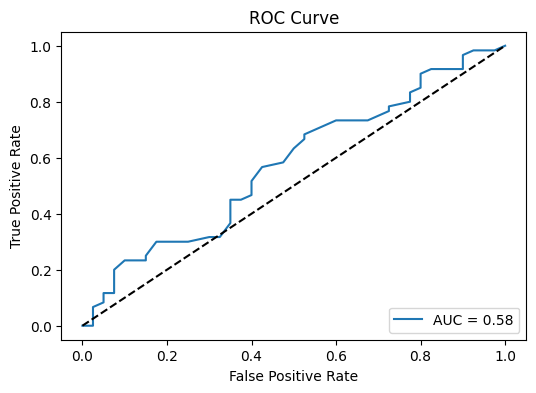

In [35]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Enrolled', 'Enrolled'], yticklabels=['Not Enrolled', 'Enrolled'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# ROC Curve and AUC Score
fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line (no skill)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


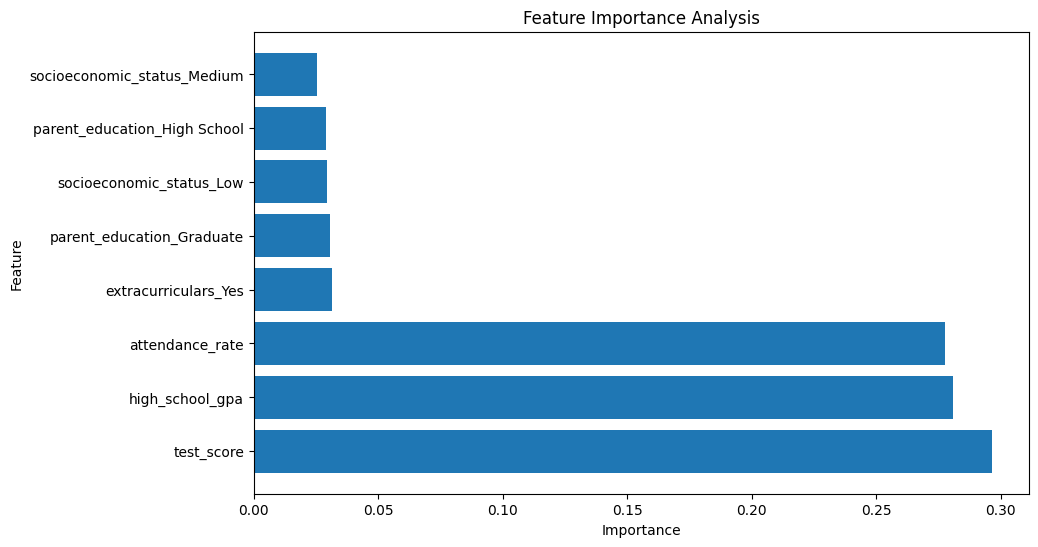

                        Feature  Importance
1                    test_score    0.296424
0               high_school_gpa    0.280781
2               attendance_rate    0.277579
7          extracurriculars_Yes    0.031210
5     parent_education_Graduate    0.030757
3      socioeconomic_status_Low    0.029210
6  parent_education_High School    0.028893
4   socioeconomic_status_Medium    0.025145


In [36]:

importance = model.feature_importances_


features = X.columns
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importance
})


importance_df = importance_df.sort_values(by='Importance', ascending=False)


plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance Analysis')
plt.show()


print(importance_df)


In [38]:

new_data = pd.DataFrame({
    'high_school_gpa': [3.5],
    'test_score': [1150],
    'attendance_rate': [90],
    'socioeconomic_status_Low': [0],
    'socioeconomic_status_Medium': [0],
    'socioeconomic_status_High': [1],
    'parent_education_High School': [0],
    'parent_education_College': [1],
    'parent_education_Graduate': [0],
    'extracurriculars_Yes': [1]
})


new_data = new_data[X_train.columns]

new_prediction = model.predict(new_data)
print(f"Prediction (1 = Enrolled, 0 = Not Enrolled): {new_prediction[0]}")

Prediction (1 = Enrolled, 0 = Not Enrolled): 1


In [39]:
import joblib


joblib.dump(model, 'student_enrollment_model.pkl')
print("Model saved to 'student_enrollment_model.pkl'")


Model saved to 'student_enrollment_model.pkl'


In [41]:
new_data = pd.DataFrame({
    'high_school_gpa': [3.5],
    'test_score': [1200],
    'attendance_rate': [95],
    'socioeconomic_status_Low': [0],
    'socioeconomic_status_Medium': [0],
    'socioeconomic_status_High': [1],
    'parent_education_High School': [0],
    'parent_education_College': [1],
    'parent_education_Graduate': [0],
    'extracurriculars_Yes': [1]
})


new_data = new_data[X_train.columns]

new_prediction = model.predict(new_data)
print(f"Prediction (1 = Enrolled, 0 = Not Enrolled): {new_prediction[0]}")

Prediction (1 = Enrolled, 0 = Not Enrolled): 1
